## Modelo de regresión líneal simple para predicción de precios de vivienda.
### En este Notebook crearemos una regresión líneal simple usando la librería sklearn y un conjunto de datos de entrenamiento anexado en el proyecto.

#### Primero importaremos las librerías que vayamos a necesitar

In [ ]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
%matplotlib inline 

#### Continuamos con la lectura de nuestros datos. Hacemos una consulta y creamos un Dataframe

In [29]:
df_raw = pd.read_csv('C:/Users/Franc/Downloads/precio_casas.csv', sep=';', header=0)
df_raw.sample(5)

,pies_cuadrados_casa,num_banios,num_habitaciones,num_cocinas,num_coches_garaje,pies_cuadrados_garaje,precio_dolares
125,754,1,2,1,0,0,84500
984,1230,1,3,1,1,305,121600
1025,1620,2,2,1,3,912,315500
169,1707,2,2,1,2,511,228000
992,1680,2,4,2,2,528,136905


#### Creamos las variables con las que entrenaremos el modelo de regresión. En este caso, estudiaremos el comportamiento que tendrá nuestro objeto de salida (Precio neto de la vivienda) en comparación del número de pies cuadrados de área que tiene cada casa.

In [25]:
X_s = df_raw['pies_cuadrados_casa'].values
y_s = df_raw['precio_dolares'].values
X_s = np.reshape(np.asarray(X_s), (len(X_s), 1))
X_s

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]], dtype=int64)

#### Antes de generar el modelo de regresión y entrenarlo, veamos como se ven nuestros datos en un gráfico de dispersión

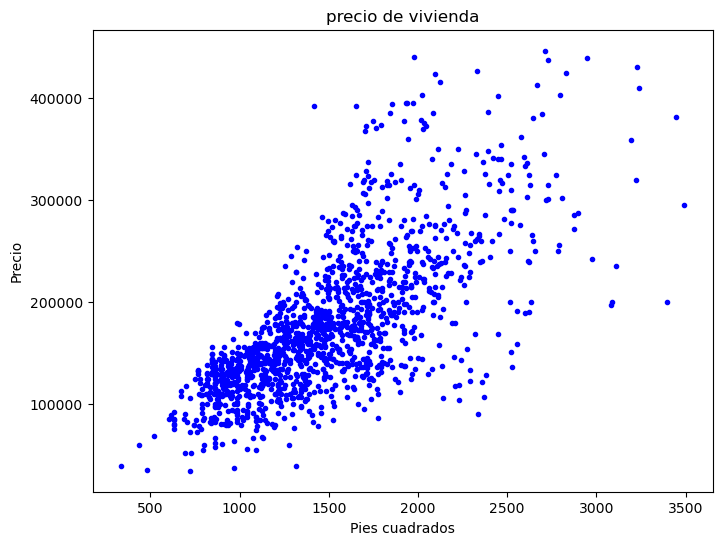

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_s, y_s, color='blue', marker='.')
ax.set_title("precio de vivienda")
ax.set_xlabel("Pies cuadrados")
ax.set_ylabel("Precio")
plt.show()

##### Creamos el modelo de regresión lineal usando Sklearn. Los datos de entrenamiento serán las variables que habíamos creado 
 $$X_{s}, Ys$$  Son los datos de entrenamiento

In [39]:
reg = linear_model.LinearRegression()
reg.fit(X_s,y_s)

LinearRegression()

#### Ahora el modelo está listo para usarse. Solo queremos conocer nuestro modelo de 'recta'. Para hacerlo haremos uso de los parámetros encontrados por el modelo.

In [41]:
a = reg.coef_[0]
b = reg.intercept_
print("Y={a:0.2f}X+{b:0.2f}".format(a=a,b=b))

Y=102.94X+23354.82


#### Nuestro modelo de recta es.
$$Y = 102.94X + 23354.82$$
Con $a=102.94, b=2335.4$

#### Ahora que conocemos la recta y nuestros datos. Veremos como se adaptan gráficamente con el modelo.
#### Graficamos datos y recta.

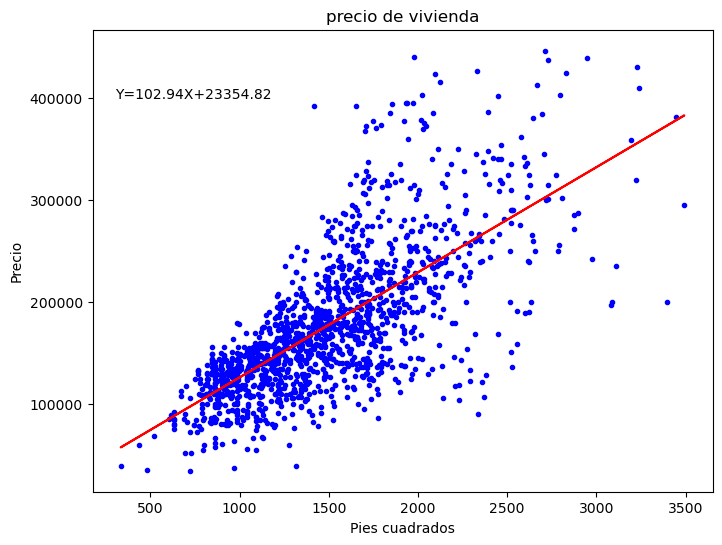

In [43]:
modelo = reg.predict(X_s)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_s, y_s, color='blue', marker='.')
ax.plot(X_s,modelo, color='red')
ax.set_title("precio de vivienda")
ax.set_xlabel("Pies cuadrados")
ax.set_ylabel("Precio")
ax.text(300,400000, "Y={a:0.2f}X+{b:0.2f}".format(a=a,b=b))
plt.show()

#### Vemos que el modelo de recta creado por el modelo se adapta a la distribución de los datos, por lo que, el modelo es congruente con lo que se esperaba.
#### Ahora solo nos queda conocer nuestra medida de error

In [45]:
r2 = reg.score(X_s,y_s)
print("Coeficiente de indeterminación R^2: {r2}".format(r2=r2))

Coeficiente de indeterminación R^2: 0.50298018549306


#### Nuestro coeficiente de indeterminación es 
$$R^{2}=0.50298018549306$$
#### lo cual es un valor de medición esperado y válido.